In [ ]:
####take a look of data from docking pipeline
import pandas as pd

# Create a dataframe
data = pd.read_csv('scores.csv') ##load csv

In [10]:
####take a look of data from docking pipeline
import pandas as pd

# Create a dataframe
data = pd.read_csv('scores.csv') ##load csv
print("info: ")
print("this is the datafile generated for docking, ")
print("column ligand contains ligand ids, and following columns")
print("vina scores by independient runs")
data



info: 
this is the datafile generated for docking, 
column ligand contains ligand ids, and following columns
vina scores by independient runs


,ligand,cycle1,cycle2,cycle3,cycle4,cycle5,cycle6,cycle7,cycle8,cycle9,...,cycle31,cycle32,cycle33,cycle34,cycle35,cycle36,cycle37,cycle38,cycle39,cycle40
0,1A6W,-5.843,-5.896,-5.886,-5.902,-5.872,-5.227,-5.905,-5.833,-5.852,...,-5.906,-5.893,-5.869,-5.875,-5.816,-5.870,-5.889,-5.846,-5.898,-5.933
1,1A9U,-6.568,-6.578,-6.655,-6.560,-6.555,-6.507,-6.541,-6.574,-6.571,...,-6.574,-6.572,-6.567,-6.559,-6.519,-6.579,-6.577,-6.583,-6.538,-6.570
2,1ABF,-5.303,-5.301,-5.300,-5.294,-5.308,-5.289,-5.298,-5.288,-5.307,...,-5.312,-5.303,-5.304,-5.298,-5.288,-5.325,-5.300,-5.372,-5.301,-5.290
3,1MRK,-5.658,-5.921,-5.424,-5.945,-5.891,-5.606,-5.932,-5.914,-5.913,...,-5.804,-5.506,-5.933,-5.921,-5.630,-5.941,-5.925,-5.947,-5.879,-5.940
4,1NIS,-5.079,-5.034,-5.044,-4.929,-4.683,-4.255,-4.929,-4.858,-5.056,...,-4.910,-4.902,-4.908,-4.997,-4.914,-4.887,-4.898,-5.097,-4.924,-4.937


info: 
this is the scatter plot that shows you the moluecular docking cycles, 
where ligands scored the best. For simplicity only shows last 10 best scores
by independient runs


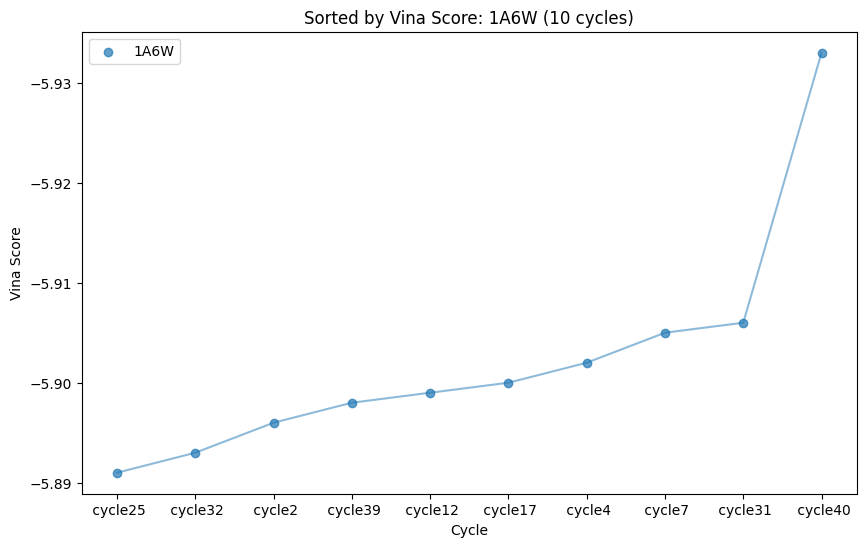

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ligand_cycles(df, ligand_name, num_cycles=10):
  """
  Plots a scatter plot for the last `num_cycles` of a ligand sorted by its Vina score.

  Args:
      df (pandas.DataFrame): The DataFrame containing Vina scores data.
      ligand_name (str): The name of the ligand to plot.
      num_cycles (int, optional): The number of last cycles to include (default: 10).
  """
  ligand_df = df[df['ligand'] == ligand_name]
  transposed_df = ligand_df.set_index('ligand').T  # Rearrange data

  ordered_df = transposed_df.sort_values(by=ligand_name, ascending=False)   # Sort by the ligand's own score 
  last_10_cycles = ordered_df.tail(num_cycles)                              #keeps only last 10 values

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.scatter(last_10_cycles.index, last_10_cycles[ligand_name], label=ligand_name, alpha=0.7)
  plt.plot(last_10_cycles.index, last_10_cycles[ligand_name], linestyle='-', alpha=0.5)

  plt.xlabel('Cycle')
  plt.ylabel('Vina Score')
  plt.title(f'Sorted by Vina Score: {ligand_name} ({num_cycles} cycles)')
  plt.legend()
  plt.gca().invert_yaxis()  # Lower score at the top
  plt.show()

df = pd.read_csv('scores.csv')        # Load CSV
ligand_names = df['ligand'].unique()  # Get unique ligand names

print("info: ")
print("this is the scatter plot that shows you the moluecular docking cycles, ")
print("where ligands scored the best. For simplicity only shows last 10 best scores")
print("by independient runs")

# Select ligand to plot
selected_ligand = ligand_names[0]
plot_ligand_cycles(df, selected_ligand, num_cycles=10)

##plot all ligands together [if so switch off previous lines]
# for lig in ligand_names:
#   plot_ligand_cycles(df, lig, num_cycles=10)



In [105]:
import pandas as pd

# Create a dataframe
data = pd.read_csv('scores.csv') ##load csv
data['best'] = data.min(axis=1, numeric_only=True)   ##add best score column
best_cycle = data.iloc[:, 1:].idxmin(axis=1) ##find the best cycle
data['best_cycle'] = best_cycle
data[['ligand', 'best_cycle', 'best']].to_csv('best.csv', index=False)

print("info: ")
print("Now, we have created a new file that contains ")
print("in which cycle (column2) the ligand reached the ")
print("lowest vina score (column3) in independent runs")
print("performed by the docking pipeline")

best = data[['ligand', 'best_cycle', 'best']]
best


info: 
Now, we have created a new file that contains 
in which cycle (column2) the ligand reached the 
lowest vina score (column3) in independent runs
performed by the docking pipeline


,ligand,best_cycle,best
0,1A6W,cycle40,-5.933
1,1A9U,cycle3,-6.655
2,1ABF,cycle38,-5.372
3,1MRK,cycle23,-5.947
4,1NIS,cycle38,-5.097


info: 
Now, we have created a new plot that shows z-scores computed for the 'best' column, also, mean and std dev are showed


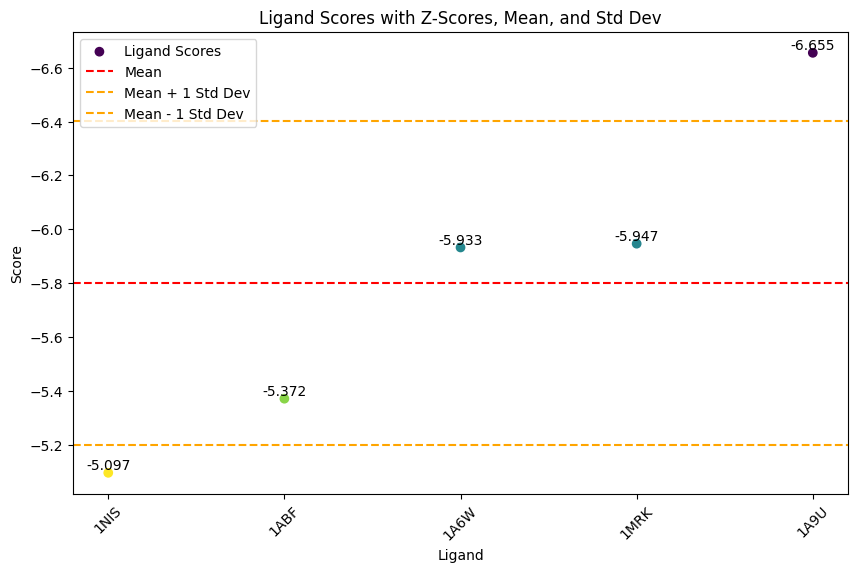

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import UnknownTimezoneWarning
from scipy.stats import zscore
import warnings

warnings.simplefilter('ignore', UnknownTimezoneWarning)

best = pd.read_csv('best.csv')[['ligand', 'best']].sort_values(by='best')
best['z_score'] = zscore(best['best'])

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis((best['best'] - min(best['best'])) / (max(best['best']) - min(best['best'])))
sc = plt.scatter(best['ligand'], best['best'], c=colors, label='Ligand Scores')

for label, x, y in zip(best['best'], best['ligand'], best['best']):
    plt.text(x, y, f'{label:.3f}', ha='center', va='bottom')

mean_line = plt.axhline(y=best['best'].mean(), color='red', linestyle='--', label='Mean')

std_dev = best['best'].std()
plt.axhline(y=best['best'].mean() + std_dev, color='orange', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=best['best'].mean() - std_dev, color='orange', linestyle='--', label='Mean - 1 Std Dev')

plt.xlabel('Ligand')
plt.ylabel('Score')
plt.title('Ligand Scores with Z-Scores, Mean, and Std Dev')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.legend()

print("info: ")
print("Now, we have created a new plot that shows z-scores computed for the 'best' column, also, mean and std dev are showed")

plt.show()



In [4]:
ls


analysis.ipynb  logs_2024-03-13/  pipeline.sh*  scores.csv  vina.conf
best.csv        nohup.out         README.me     target/
ligands/        pipeline/         results/      utils/


In [6]:
##pip install py3Dmol ##install if needed

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.3 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
##https://www.blopig.com/blog/2016/10/viewing-3d-molecules-interactively-in-jupyter-ipython-notebooks/
import py3Dmol

# Define file paths
target = 'target/RBD/RBD.pdb'
ligand = 'results/1MRK_c50.pdbqt'

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

view.addModel(open(target,'r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})


view.addModel(open(ligand,'r').read(),format='mol2')
ref_m = view.getModel()
ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
import py3Dmol

# Creating the visualization object
view = py3Dmol.view()

# Remove any existing models
view.removeAllModels()

# Set view style
view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})

# Add protein structure
view.addModel(open('1AZ8_clean_H.pdb', 'r').read(), format='pdb')
protein_model = view.getModel()
protein_model.setStyle({'cartoon': {'arrows': True, 'tubes': True, 'style': 'oval', 'color': 'white'}})
view.addSurface(py3Dmol.VDW, {'opacity': 0.6, 'color': 'white'})

# Add ligand structure
view.addModel(open('1AZ8_lig_H.mol2', 'r').read(), format='mol2')
ligand_model = view.getModel()
ligand_model.setStyle({}, {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.2}})

# Zoom to fit all models
view.zoomTo()

# Show the visualization
view.show()


ModuleNotFoundError: No module named 'py3Dmol'

In [ ]:
###tmp codes [just in case of repurposing]
import pandas as pd
import matplotlib.pyplot as plt

def plot_ligand_cycles(df, ligand_name, num_cycles=10):
  """
  Plots a scatter plot for the last `num_cycles` of a ligand sorted by its Vina score.

  Args:
      df (pandas.DataFrame): The DataFrame containing Vina scores data.
      ligand_name (str): The name of the ligand to plot.
      num_cycles (int, optional): The number of last cycles to include (default: 10).
  """
  ligand_df = df[df['ligand'] == ligand_name]
  transposed_df = ligand_df.set_index('ligand').T  # Rearrange data

  ordered_df = transposed_df.sort_values(by=ligand_name, ascending=False)   # Sort by the ligand's own score 
  last_10_cycles = ordered_df.tail(num_cycles)                              # Keeps only last 10 values

  return last_10_cycles

df = pd.read_csv('scores.csv')        # Load CSV
ligand_names = df['ligand'].unique()  # Get unique ligand names

print("info: plots all toghether")
print("this is the scatter plot that shows you the molecular docking cycles, ")
print("where ligands scored the best. For simplicity, it only shows the last 10 best scores")
print("by independent runs")

# Plot all ligands together
plt.figure(figsize=(10, 6))

for lig in ligand_names:
    ligand_data = plot_ligand_cycles(df, lig, num_cycles=10)
    plt.scatter(ligand_data.index, ligand_data[lig], label=lig, alpha=0.7)
    plt.plot(ligand_data.index, ligand_data[lig], linestyle='-', alpha=0.5)

plt.xlabel('Cycle')
plt.ylabel('Vina Score')
plt.title(f'Sorted by Vina Score: All Ligands (last 10 cycles)')
plt.legend()
plt.gca().invert_yaxis()  # Lower score at the top
plt.show()